# Maria's notebook
* Linear regression models
* Data analysis: fixed acidity, volatile acidity, citric acid, residual sugar, pH
* Best and worst wine comparison
* Some ideas for predicting

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [6]:
data = pd.read_csv("red_wine.csv")

In [7]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Multi-variate linear regression models

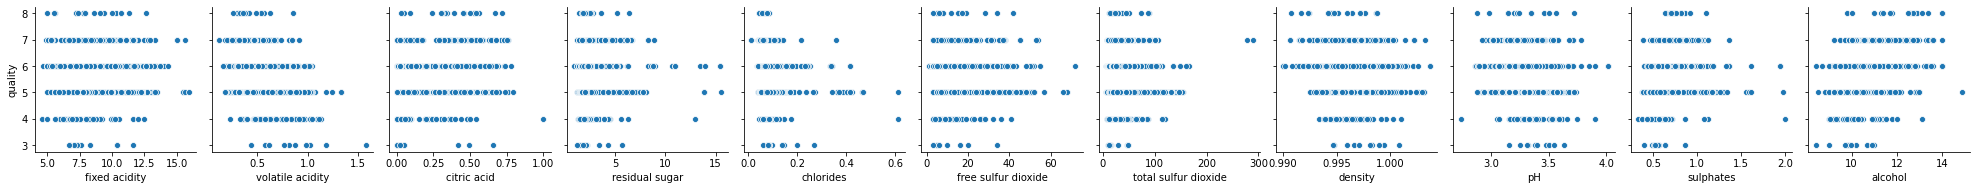

In [8]:
sns.pairplot(data = data, x_vars=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'], y_vars=['quality'])

With these results it is quite hard to say, which features are useful for predicting

**Separating the data into training (70%) and test data (30%).**

In [9]:
datacopy = data.copy()
import numpy as np
from sklearn.model_selection import train_test_split
X = datacopy
y = datacopy.pop('quality')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train.shape
X_test.shape

(480, 11)

**Training 3 different linear models and calculating the MSE on test data for each model.**

In [10]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr.fit(X_train, y_train)
pred_lr= lr.predict(X_test)
print("Linear MSE: " + str(mean_squared_error(y_test, pred_lr))) 

ridge = Ridge()
ridge.fit(X_train, y_train) 
pred_ridge= ridge.predict(X_test)
print("Ridge MSE: " + str(mean_squared_error(y_test, pred_ridge))) 

lasso = Lasso()
lasso.fit(X_train, y_train) 
pred_lasso= lasso.predict(X_test)
print("Lasso MSE: " + str(mean_squared_error(y_test, pred_lasso)))

Linear MSE: 0.4147279618151055
Ridge MSE: 0.4138061884372442
Lasso MSE: 0.5951007033497423


**The lowest value can be get with Ridge model**

In [11]:
lr.coef_

array([ 4.58527906e-02, -1.17640321e+00, -2.87778222e-01,  1.64922765e-02,
       -1.80636202e+00,  6.07141383e-03, -3.77903394e-03, -3.26155240e+01,
       -3.75065394e-01,  8.87110235e-01,  2.67134606e-01])

In [12]:
lasso.coef_

array([ 0.        , -0.        ,  0.        ,  0.        , -0.        ,
        0.        , -0.00389417, -0.        , -0.        ,  0.        ,
        0.        ])

In [16]:
ridge.coef_

array([ 2.08608077e-02, -1.19685468e+00, -2.88427773e-01,  8.95351983e-04,
       -1.17670052e+00,  6.44539357e-03, -3.78699716e-03, -2.49855700e-02,
       -4.51375068e-01,  7.53977743e-01,  3.04267834e-01])

**The signs of coefficient reflect to if the correlation is positive or negative. Actual number can't really interprated, because features have different scales.**

## Data analysis

### Relation between fixed acidity and qualitiy

In [10]:
data["fixed acidity"].sort_values()

45      4.6
95      4.7
821     4.9
588     5.0
94      5.0
       ... 
555    15.5
554    15.5
442    15.6
557    15.6
652    15.9
Name: fixed acidity, Length: 1599, dtype: float64

Text(0, 0.5, 'fixed acidity')

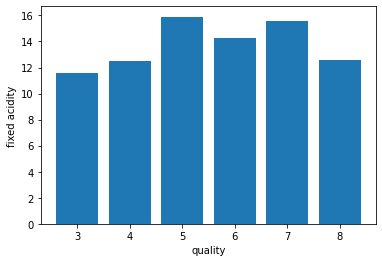

In [11]:
plt.bar(data['quality'], data["fixed acidity"])
plt.xlabel("quality")
plt.ylabel("fixed acidity")

The graph showes that there is correlation between fixed acidity and quality.

In [12]:
x = data["fixed acidity"]
y = data["quality"]

**Dividing fixed acidity into ranges, so that the ranges have quite similar amount of data.**
* Lower than 7
* 7 - 7.5
* 7.5 - 8
* 8 - 9
* 9 - 10
* over 10 <br>

First is finding ranges, then making arrays. More specifical explanation is in George's file.

In [13]:
F1=0
F2=0
F3=0
F4=0
F5=0
F6=0

for i in range(len(x)):
    if x[i] <= 7:
        F1 += 1
    elif x[i] > 7 and x[i] <= 7.5:
        F2 += 1
    elif x[i] > 7.5 and x[i] <= 8:
        F3 +=1
    elif x[i] > 8 and x[i] <= 9:
        F4 +=1
    elif x[i] > 9 and x[i] <= 10:
        F5 +=1
    else:
        F6 += 1
        
print(F1)
print(F2)
print(F3)
print(F4)
print(F5)
print(F6)

362
264
232
300
188
253


In [14]:
F1_q = []
F2_q = []
F3_q = []
F4_q = []
F5_q = []
F6_q = []
for i in range(len(x)):
    if x[i] <= 7:
        F1_q.append(y[i])
    elif x[i] > 7 and x[i] <= 7.5:
        F2_q.append(y[i])
    elif x[i] > 7.5 and x[i] <= 8:
        F3_q.append(y[i]) 
    elif x[i] > 8 and x[i] <= 9:
        F4_q.append(y[i])   
    elif x[i] > 9 and x[i] <= 10:
        F5_q.append(y[i])   
    else:
        F6_q.append(y[i])
print(len(F1_q))
print(len(F2_q))
print(len(F3_q))
print(len(F4_q))
print(len(F5_q))
print(len(F6_q))

362
264
232
300
188
253


In [15]:
def keskmine(a):
    summa = 0
    for i in range(len(a)):
        summa += a[i]
    return summa/len(a)

In [16]:
print("Fixed acidity average 1: " + str(keskmine(F1_q)))
print("Fixed acidity average 2: " + str(keskmine(F2_q)))
print("Fixed acidity average 3: " + str(keskmine(F3_q)))
print("Fixed acidity average 4: " + str(keskmine(F4_q)))
print("Fixed acidity average 5: " + str(keskmine(F5_q)))
print("Fixed acidity average 6: " + str(keskmine(F6_q)))

Fixed acidity average 1: 5.588397790055248
Fixed acidity average 2: 5.503787878787879
Fixed acidity average 3: 5.556034482758621
Fixed acidity average 4: 5.59
Fixed acidity average 5: 5.712765957446808
Fixed acidity average 6: 5.913043478260869


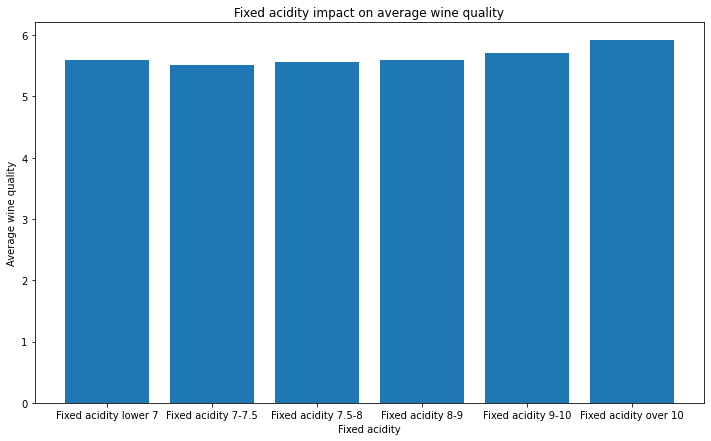

In [17]:
abi_x = ["Fixed acidity lower 7", "Fixed acidity 7-7.5", "Fixed acidity 7.5-8", "Fixed acidity 8-9", "Fixed acidity 9-10", "Fixed acidity over 10"]
abi_y = [keskmine(F1_q), keskmine(F2_q), keskmine(F3_q), keskmine(F4_q), keskmine(F5_q), keskmine(F6_q)]
plt.figure(figsize = (12,7))
plt.bar(abi_x, abi_y)
plt.title("Fixed acidity impact on average wine quality")
plt.xlabel("Fixed acidity")
plt.ylabel("Average wine quality")
plt.show()

This graph showes that fixed acidity increases little bit when the quality is better. 

In [18]:
def jagunemine(a):
    Halb = 0
    Keskmine = 0
    Hea = 0
    Super = 0
    Tulemus = []
    for i in range (len(a)):
        if a[i] == 3 or a[i] == 4:
            Halb += 1
        elif a[i] == 5 or a[i] == 6:
            Keskmine += 1
        elif a[i] == 7:
            Hea +=1
        else:
            Super +=1
    Halb_prc = Halb/len(a)
    Keskmine_prc = Keskmine/len(a)
    Hea_prc = Hea/len(a)
    Super_prc = Super/len(a)
    Tulemus = [Halb_prc, Keskmine_prc, Hea_prc, Super_prc]
    return Tulemus

In [91]:
fixed_1 = jagunemine(F1_q)
fixed_2 = jagunemine(F2_q)
fixed_3 = jagunemine(F3_q)
fixed_4 = jagunemine(F4_q)
fixed_5 = jagunemine(F5_q)
fixed_6 = jagunemine(F6_q)


In [20]:
abi = ["Bad wine", "Average wine", "Good wine", "Superb wine"]

<Figure size 432x288 with 0 Axes>

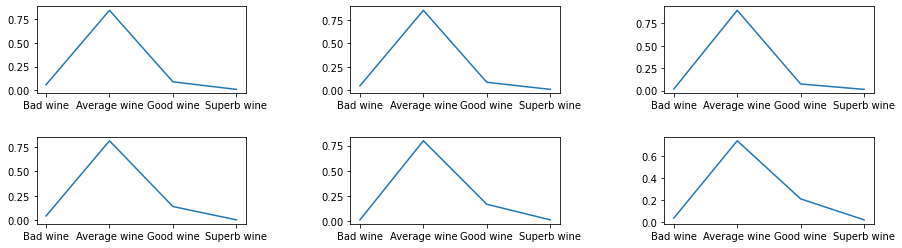

In [21]:
from matplotlib import pyplot as plt
fig = plt.figure()
plt.figure(figsize=(15,4))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.subplot(2, 3, 1).plot(abi, fixed_1)
plt.subplot(2, 3, 2).plot(abi, fixed_2)
plt.subplot(2, 3, 3).plot(abi, fixed_3)
plt.subplot(2, 3, 4).plot(abi, fixed_4)
plt.subplot(2, 3, 5).plot(abi, fixed_5)
plt.subplot(2, 3, 6).plot(abi, fixed_6)

In [22]:
def barplot(X, Y, Title):
    plt.figure(figsize = (5, 5))
    plt.bar(X, Y)
    plt.title(Title)
    plt.show()

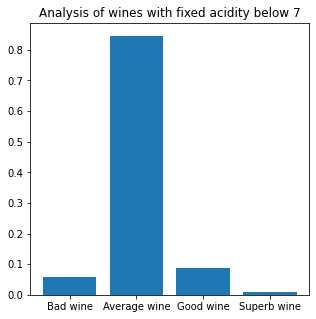

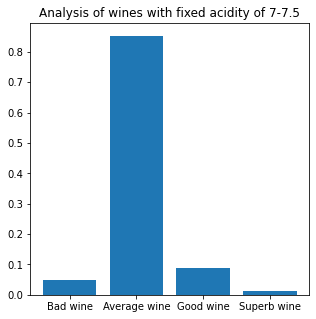

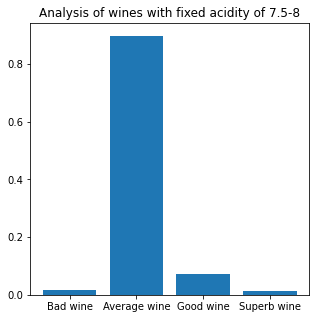

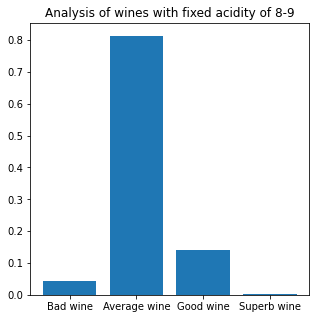

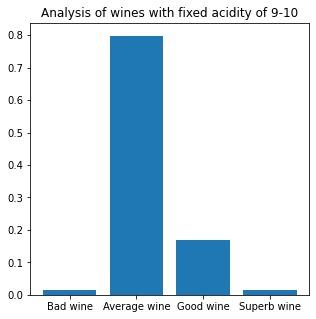

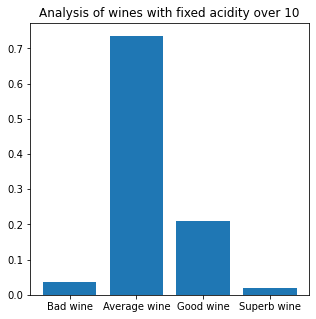

In [23]:
barplot(abi, fixed_1, "Analysis of wines with fixed acidity below 7")
barplot(abi, fixed_2, "Analysis of wines with fixed acidity of 7-7.5")
barplot(abi, fixed_3, "Analysis of wines with fixed acidity of 7.5-8")
barplot(abi, fixed_4, "Analysis of wines with fixed acidity of 8-9")
barplot(abi, fixed_5, "Analysis of wines with fixed acidity of 9-10")
barplot(abi, fixed_6, "Analysis of wines with fixed acidity over 10")

These graphs shows that the higher the fixed acidity, the larger is the number of good and superb wines. But the difference isn't so big as with alcohol.

(These acids either occur naturally in the grapes or are created through the fermentation process.)

### Relation between volatile acidity and qualitiy

Text(0, 0.5, 'volatile acidity')

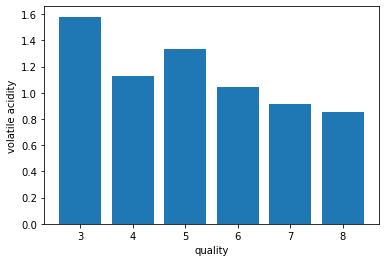

In [25]:
plt.bar(data['quality'], data["volatile acidity"])
plt.xlabel("quality")
plt.ylabel("volatile acidity")

It is clear that the lower the volatile acidity, the better the quality (with exeption quality 5).

**Dividing volatile acidity into ranges, so that the ranges have quite similar amount of data.**
* Lower than 0.35
* 0.35 - 0.45
* 0.45 - 0.55
* 0.55 - 0.6
* 0.6 - 0.7
* over 0.7 <br>

In [26]:
l = data["volatile acidity"]
V1_q=[]
V2_q=[]
V3_q=[]
V4_q=[]
V5_q=[]
V6_q=[]

for i in range(len(l)):
    if l[i] <= 0.35:
        V1_q.append(y[i])
    elif l[i] > 0.35 and l[i] <= 0.45:
        V2_q.append(y[i])
    elif l[i] > 0.45 and l[i] <= 0.55:
        V3_q.append(y[i])
    elif l[i] > 0.55 and l[i] <= 0.6:
        V4_q.append(y[i])
    elif l[i] > 0.6 and l[i] <= 0.7:
        V5_q.append(y[i])
    else:
        V6_q.append(y[i])    
print(len(V1_q))
print(len(V2_q))
print(len(V3_q))
print(len(V4_q))
print(len(V5_q))
print(len(V6_q))

272
328
301
194
281
223


In [27]:
print("Volatile acidity average 1: " + str(round(keskmine(V1_q), 2)))
print("Volatile acidity average 2: " + str(round(keskmine(V2_q), 2)))
print("Volatile acidity average 3: " + str(round(keskmine(V3_q), 2)))
print("Volatile acidity average 4: " + str(round(keskmine(V4_q), 2)))
print("Volatile acidity average 5: " + str(round(keskmine(V5_q), 2)))
print("Volatile acidity average 6: " + str(round(keskmine(V6_q), 2)))

Volatile acidity average 1: 6.18
Volatile acidity average 2: 5.8
Volatile acidity average 3: 5.64
Volatile acidity average 4: 5.49
Volatile acidity average 5: 5.37
Volatile acidity average 6: 5.2


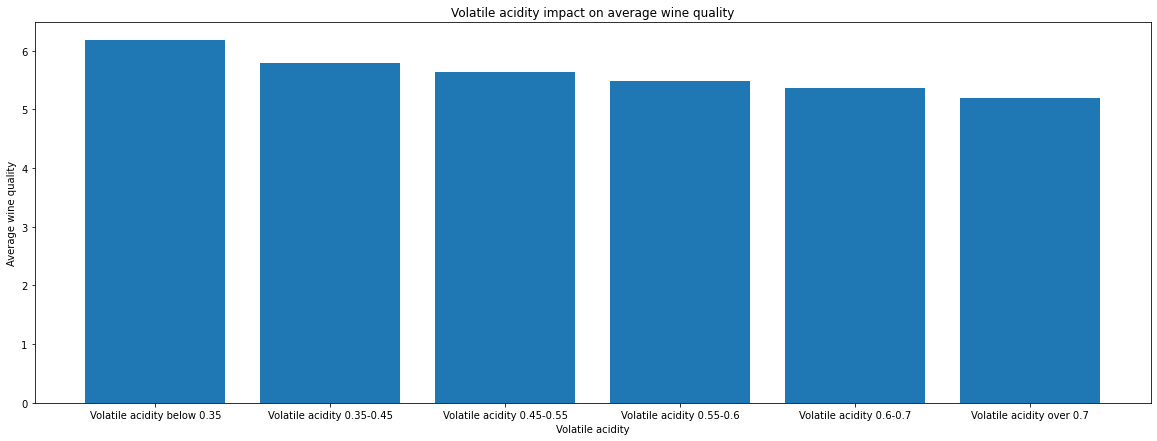

In [28]:
abi_x = ["Volatile acidity below 0.35", "Volatile acidity 0.35-0.45", "Volatile acidity 0.45-0.55", "Volatile acidity 0.55-0.6", "Volatile acidity 0.6-0.7", "Volatile acidity over 0.7"]
abi_y = [keskmine(V1_q), keskmine(V2_q), keskmine(V3_q), keskmine(V4_q), keskmine(V5_q), keskmine(V6_q)]
plt.figure(figsize = (20,7))
plt.bar(abi_x, abi_y)
plt.title("Volatile acidity impact on average wine quality")
plt.xlabel("Volatile acidity")
plt.ylabel("Average wine quality")
plt.show()

It is clear that the higher the volatile acidity, the worse the quality. Volatile acidity is mostly caused by bacteria in the wine, creating acetic acid (high levels lead to unpleasant taste). So the less volatile acidity, the better the quality.

In [29]:
volatile_1 = jagunemine(F1_q)
volatile_2 = jagunemine(F2_q)
volatile_3 = jagunemine(F3_q)
volatile_4 = jagunemine(F4_q)
volatile_5 = jagunemine(F5_q)
volatile_6 = jagunemine(F6_q)

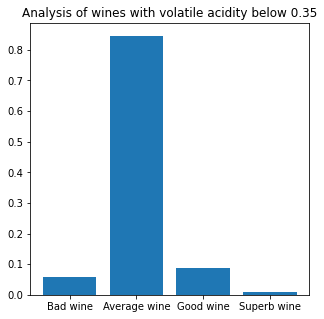

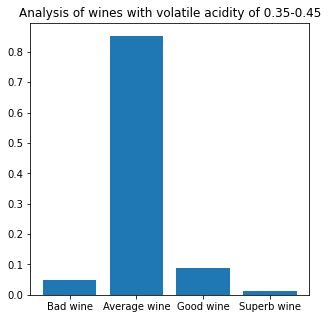

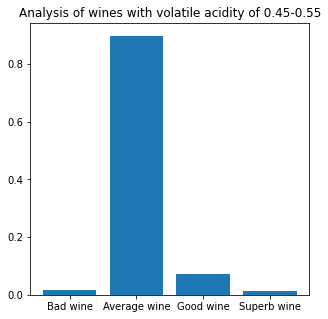

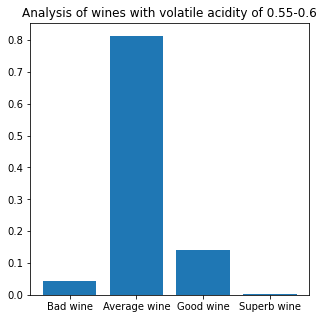

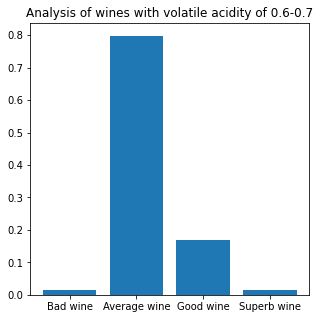

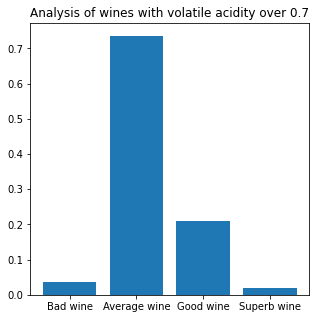

In [30]:
barplot(abi, volatile_1, "Analysis of wines with volatile acidity below 0.35")
barplot(abi, volatile_2, "Analysis of wines with volatile acidity of 0.35-0.45")
barplot(abi, volatile_3, "Analysis of wines with volatile acidity of 0.45-0.55")
barplot(abi, volatile_4, "Analysis of wines with volatile acidity of 0.55-0.6")
barplot(abi, volatile_5, "Analysis of wines with volatile acidity of 0.6-0.7")
barplot(abi, volatile_6, "Analysis of wines with volatile acidity over 0.7")

### Relation between citric acid and quality

Text(0, 0.5, 'citric acid')

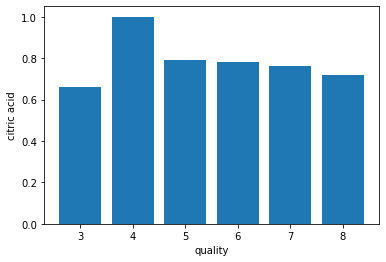

In [32]:
plt.bar(data['quality'], data["citric acid"])
plt.xlabel("quality")
plt.ylabel("citric acid")

It isn't very clear whether the cirtric acid has an impact to quality.

In [33]:
data["citric acid"].sort_values()

0       0.00
742     0.00
739     0.00
737     0.00
719     0.00
        ... 
258     0.76
442     0.76
1574    0.78
353     0.79
151     1.00
Name: citric acid, Length: 1599, dtype: float64

**Dividing citric acidity into ranges, so that the ranges have quite similar amount of data.**
* Lower than 0.05
* 0.05 - 0.15
* 0.15 - 0.25
* 0.25 - 0.35
* 0.35 - 0.47
* over 0.47 <br>

In [34]:
x = data["citric acid"]
C1_q=[]
C2_q=[]
C3_q=[]
C4_q=[]
C5_q=[]
C6_q=[]

for i in range(len(l)):
    if x[i] <= 0.05:
        C1_q.append(y[i])
    elif x[i] > 0.05 and x[i] <= 0.15:
        C2_q.append(y[i])
    elif x[i] > 0.15 and x[i] <= 0.25:
        C3_q.append(y[i])
    elif x[i] > 0.25 and x[i] <= 0.35:
        C4_q.append(y[i])
    elif x[i] > 0.35 and x[i] <= 0.47:
        C5_q.append(y[i])
    else:
        C6_q.append(y[i])    
print(len(C1_q))
print(len(C2_q))
print(len(C3_q))
print(len(C4_q))
print(len(C5_q))
print(len(C6_q))

294
244
256
252
252
301


In [35]:
print("Citric acid average 1: " + str(round(keskmine(C1_q), 2)))
print("Citric acid average 2: " + str(round(keskmine(C2_q), 2)))
print("Citric acid average 3: " + str(round(keskmine(C3_q), 2)))
print("Citric acid average 4: " + str(round(keskmine(C4_q), 2)))
print("Citric acid average 5: " + str(round(keskmine(C5_q), 2)))
print("Citric acid average 6: " + str(round(keskmine(C6_q), 2)))

Citric acid average 1: 5.44
Citric acid average 2: 5.5
Citric acid average 3: 5.41
Citric acid average 4: 5.68
Citric acid average 5: 5.96
Citric acid average 6: 5.83


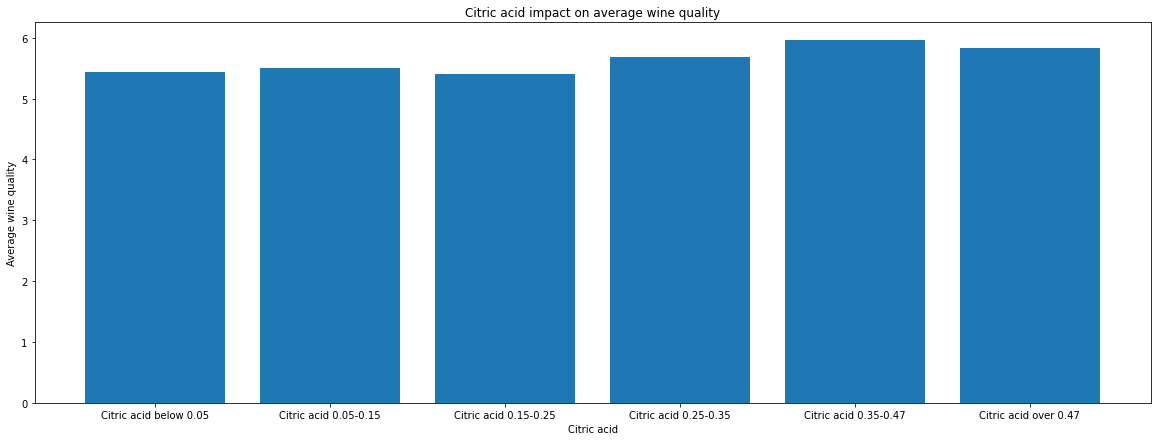

In [36]:
abi_x = ["Citric acid below 0.05", "Citric acid 0.05-0.15", "Citric acid 0.15-0.25", "Citric acid 0.25-0.35", "Citric acid 0.35-0.47", "Citric acid over 0.47"]
abi_y = [keskmine(C1_q), keskmine(C2_q), keskmine(C3_q), keskmine(C4_q), keskmine(C5_q), keskmine(C6_q)]
plt.figure(figsize = (20,7))
plt.bar(abi_x, abi_y)
plt.title("Citric acid impact on average wine quality")
plt.xlabel("Citric acid")
plt.ylabel("Average wine quality")
plt.show()

It seems that the higher the citric acid, the better quality, but the relation isn't very clear.

Citric acid acts as a preservative and is added to wines to increase acidity, complement a specific flavor or prevent ferric hazes. It can be added to finished wines to increase acidity and give a “fresh” flavor. Excess addition, however, can ruin the taste.

In [37]:
citric_1 = jagunemine(C1_q)
citric_2 = jagunemine(C2_q)
citric_3 = jagunemine(C3_q)
citric_4 = jagunemine(C4_q)
citric_5 = jagunemine(C5_q)
citric_6 = jagunemine(C6_q)

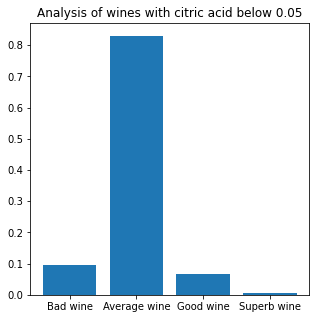

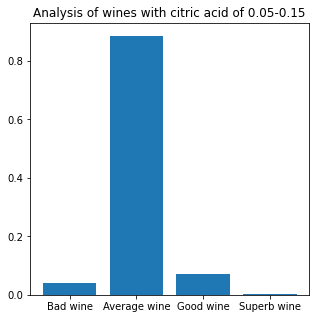

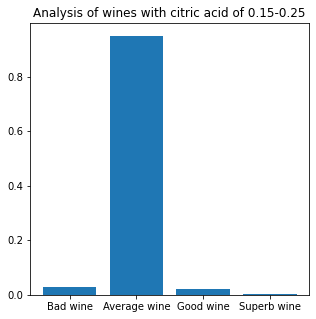

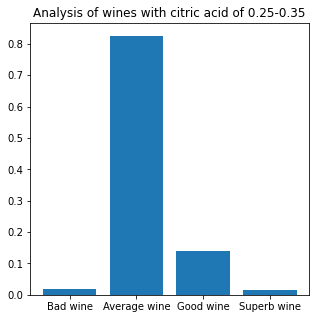

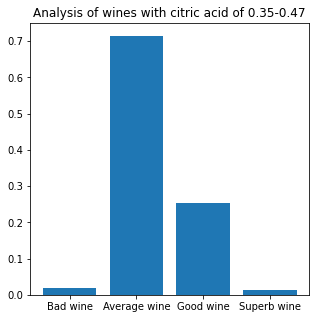

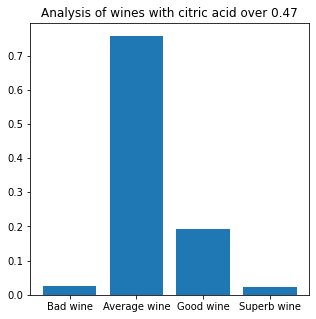

In [38]:
barplot(abi, citric_1, "Analysis of wines with citric acid below 0.05")
barplot(abi, citric_2, "Analysis of wines with citric acid of 0.05-0.15")
barplot(abi, citric_3, "Analysis of wines with citric acid of 0.15-0.25")
barplot(abi, citric_4, "Analysis of wines with citric acid of 0.25-0.35")
barplot(abi, citric_5, "Analysis of wines with citric acid of 0.35-0.47")
barplot(abi, citric_6, "Analysis of wines with citric acid over 0.47")

These plots show that good wine tulp is higher when the citric acid concentration is higher.

### Relation between residual sugar and quality

Text(0, 0.5, 'residual sugar')

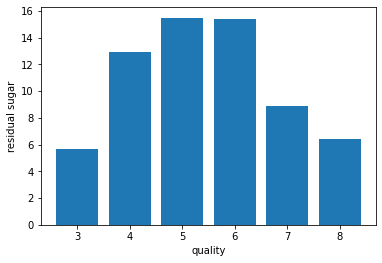

In [40]:
plt.bar(data['quality'], data["residual sugar"])
plt.xlabel("quality")
plt.ylabel("residual sugar")

The relation is unclear.

In [41]:
data["residual sugar"].sort_values()

1018     0.9
1017     0.9
1374     1.2
1321     1.2
469      1.2
        ... 
1476    13.8
1574    13.9
1435    15.4
1434    15.4
480     15.5
Name: residual sugar, Length: 1599, dtype: float64

**Dividing residual sugar into ranges, so that the ranges have quite similar amount of data.**
* Lower than 1.75
* 1.75 - 1.95
* 1.95 - 2.15
* 2.15 - 2.35
* 2.35 - 2.75
* over 2.75 <br>

In [42]:
x = data["residual sugar"]
R1_q=[]
R2_q=[]
R3_q=[]
R4_q=[]
R5_q=[]
R6_q=[]

for i in range(len(l)):
    if x[i] <= 1.75:
        R1_q.append(y[i])
    elif x[i] > 1.75 and x[i] <= 1.95:
        R2_q.append(y[i])
    elif x[i] > 1.95 and x[i] <= 2.15:
        R3_q.append(y[i])
    elif x[i] > 2.15 and x[i] <= 2.35:
        R4_q.append(y[i])
    elif x[i] > 2.35 and x[i] <= 2.75:
        R5_q.append(y[i])
    else:
        R6_q.append(y[i])    
print(len(R1_q))
print(len(R2_q))
print(len(R3_q))
print(len(R4_q))
print(len(R5_q))
print(len(R6_q))

218
246
288
242
290
315


In [43]:
print("Residual sugar average 1: " + str(round(keskmine(R1_q), 2)))
print("Residual sugar average 2: " + str(round(keskmine(R2_q), 2)))
print("Residual sugar average 3: " + str(round(keskmine(R3_q), 2)))
print("Residual sugar average 4: " + str(round(keskmine(R4_q), 2)))
print("Residual sugar average 5: " + str(round(keskmine(R5_q), 2)))
print("Residual sugar average 6: " + str(round(keskmine(R6_q), 2)))

Residual sugar average 1: 5.56
Residual sugar average 2: 5.63
Residual sugar average 3: 5.61
Residual sugar average 4: 5.61
Residual sugar average 5: 5.73
Residual sugar average 6: 5.64


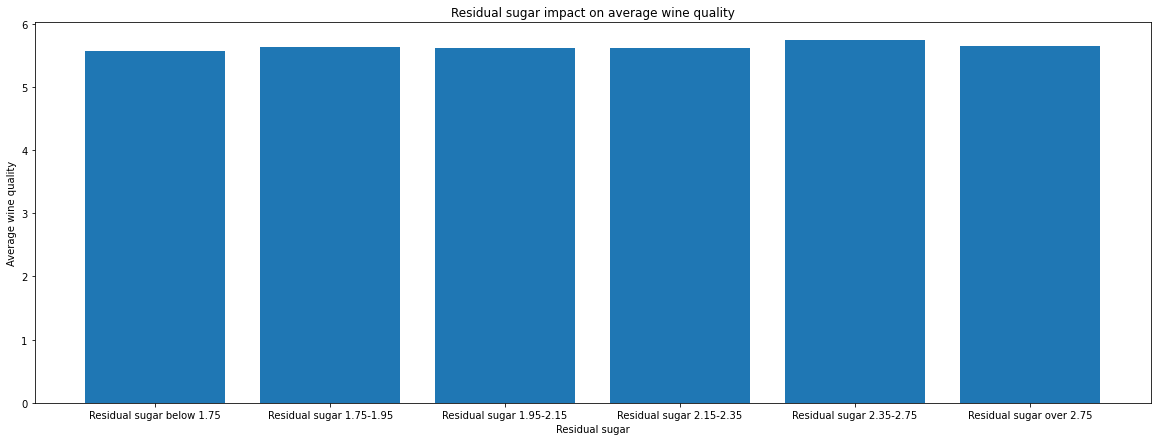

In [44]:
abi_x = ["Residual sugar below 1.75", "Residual sugar 1.75-1.95", "Residual sugar 1.95-2.15", "Residual sugar 2.15-2.35", "Residual sugar 2.35-2.75", "Residual sugar over 2.75"]
abi_y = [keskmine(R1_q), keskmine(R2_q), keskmine(R3_q), keskmine(R4_q), keskmine(R5_q), keskmine(R6_q)]
plt.figure(figsize = (20,7))
plt.bar(abi_x, abi_y)
plt.title("Residual sugar impact on average wine quality")
plt.xlabel("Residual sugar")
plt.ylabel("Average wine quality")
plt.show()

This shows that residual sugar doesn't imapct quality.

To make a wine that tastes good, the key is to have a perfect balance between the sweetness and the sourness in the drink. Because it is weird that the sugar doesn't have an impact.

In [45]:
sugar_1 = jagunemine(R1_q)
sugar_2 = jagunemine(R2_q)
sugar_3 = jagunemine(R3_q)
sugar_4 = jagunemine(R4_q)
sugar_5 = jagunemine(R5_q)
sugar_6 = jagunemine(R6_q)

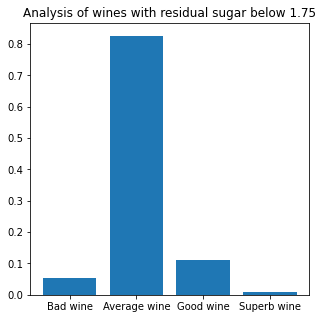

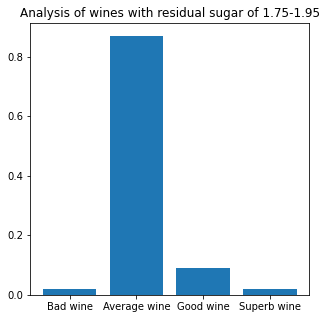

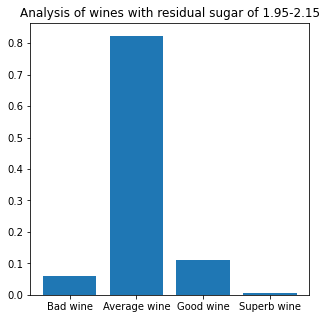

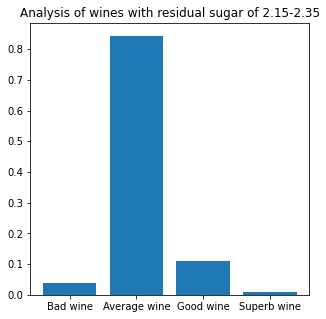

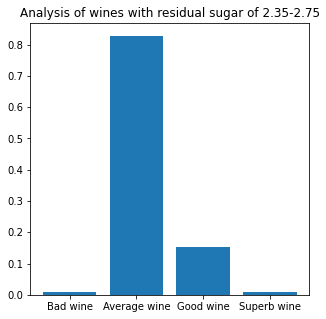

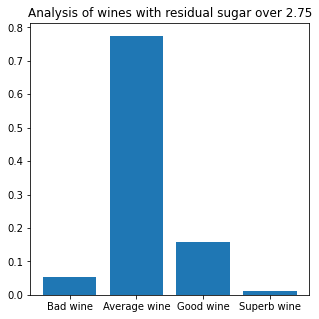

In [46]:
barplot(abi, sugar_1, "Analysis of wines with residual sugar below 1.75")
barplot(abi, sugar_2, "Analysis of wines with residual sugar of 1.75-1.95")
barplot(abi, sugar_3, "Analysis of wines with residual sugar of 1.95-2.15")
barplot(abi, sugar_4, "Analysis of wines with residual sugar of 2.15-2.35")
barplot(abi, sugar_5, "Analysis of wines with residual sugar of 2.35-2.75")
barplot(abi, sugar_6, "Analysis of wines with residual sugar over 2.75")

### Relation between pH and quality

Text(0, 0.5, 'pH')

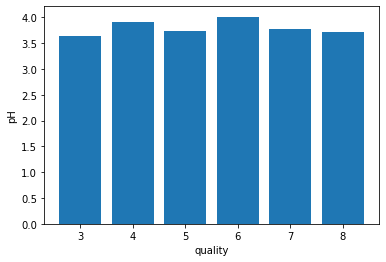

In [48]:
plt.bar(data['quality'], data["pH"])
plt.xlabel("quality")
plt.ylabel("pH")

Relation is unclear, but if there is more acid, then the pH should be lower.

In [49]:
data["pH"].sort_values()

151     2.74
544     2.86
614     2.87
440     2.88
1470    2.88
        ... 
95      3.85
45      3.90
695     3.90
1316    4.01
1321    4.01
Name: pH, Length: 1599, dtype: float64

**Dividing pH into ranges, so that the ranges have quite similar amount of data.**
* Lower than 3.2
* 3.2 - 3.3
* 3.3 - 3.4
* over 3.4

In [50]:
x = data["pH"]
P1_q=[]
P2_q=[]
P3_q=[]
P4_q=[]

for i in range(len(l)):
    if x[i] <= 3.2:
        P1_q.append(y[i])
    elif x[i] > 3.2 and x[i] <= 3.3:
        P2_q.append(y[i])
    elif x[i] > 3.3 and x[i] <= 3.4:
        P3_q.append(y[i])
    else:
        P4_q.append(y[i])    
print(len(P1_q))
print(len(P2_q))
print(len(P3_q))
print(len(P4_q))

388
395
429
387


In [51]:
print("pH average 1: " + str(round(keskmine(P1_q), 2)))
print("pH average 2: " + str(round(keskmine(P2_q), 2)))
print("pH sugar average 3: " + str(round(keskmine(P3_q), 2)))
print("pH sugar average 4: " + str(round(keskmine(P4_q), 2)))

pH average 1: 5.66
pH average 2: 5.69
pH sugar average 3: 5.63
pH sugar average 4: 5.56


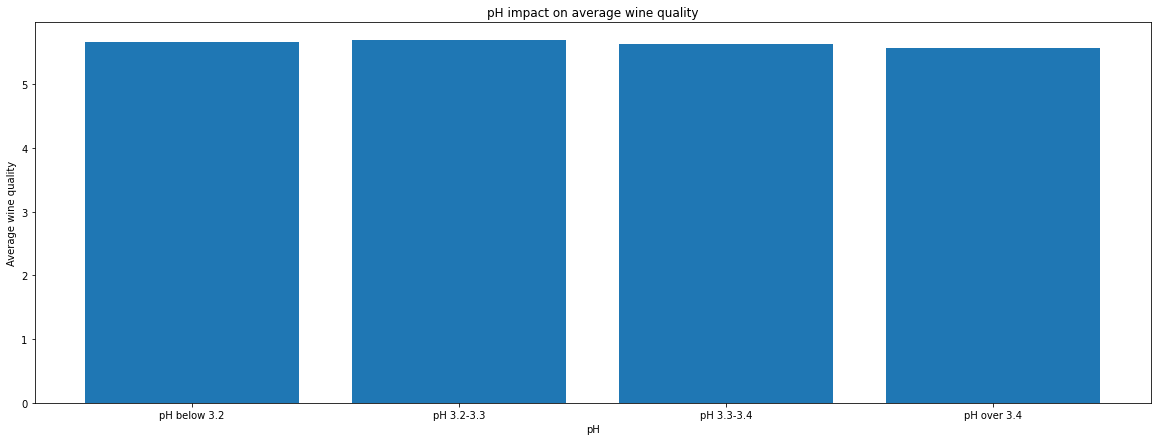

In [52]:
abi_x = ["pH below 3.2", "pH 3.2-3.3", "pH 3.3-3.4", "pH over 3.4"]
abi_y = [keskmine(P1_q), keskmine(P2_q), keskmine(P3_q), keskmine(P4_q)]
plt.figure(figsize = (20,7))
plt.bar(abi_x, abi_y)
plt.title("pH impact on average wine quality")
plt.xlabel("pH")
plt.ylabel("Average wine quality")
plt.show()

There isn't or very low relation. 

In [53]:
pH_1 = jagunemine(P1_q)
pH_2 = jagunemine(P2_q)
pH_3 = jagunemine(P3_q)
pH_4 = jagunemine(P4_q)

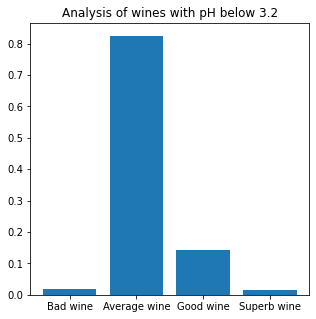

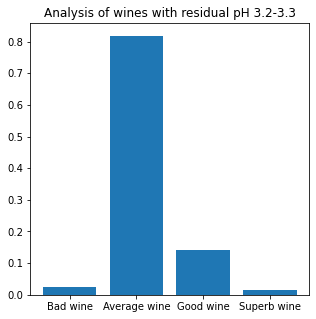

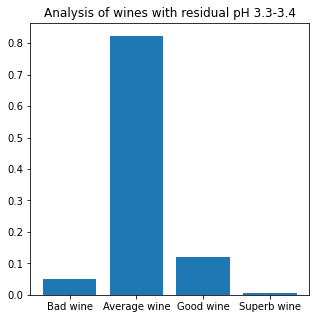

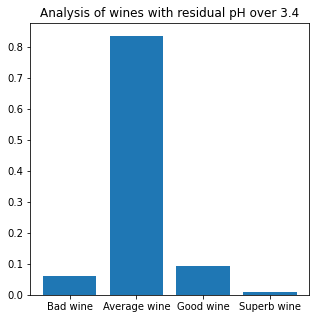

In [54]:
barplot(abi, pH_1, "Analysis of wines with pH below 3.2")
barplot(abi, pH_2, "Analysis of wines with residual pH 3.2-3.3")
barplot(abi, pH_3, "Analysis of wines with residual pH 3.3-3.4")
barplot(abi, pH_4, "Analysis of wines with residual pH over 3.4")

### Relation between fixed acidity and volatile acidity

**Finding correlation**

In [56]:
correlation = data['fixed acidity'].corr(data['volatile acidity'])
correlation

-0.25613089477038203

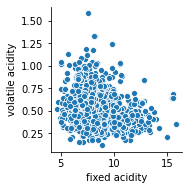

In [57]:
sns.pairplot(data=data, x_vars=['fixed acidity'], y_vars=['volatile acidity'])

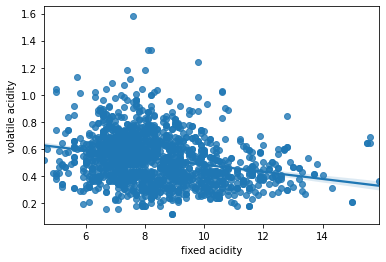

In [24]:
sns.regplot(data=data, x ="fixed acidity", y="volatile acidity")

Text(0, 0.5, 'Volatile acidity')

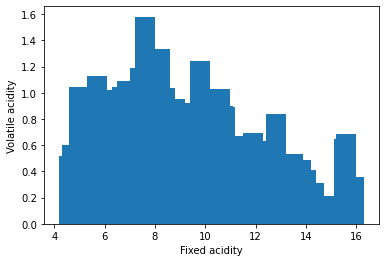

In [58]:
plt.bar(data['fixed acidity'], data["volatile acidity"])
plt.xlabel("Fixed acidity")
plt.ylabel("Volatile acidity")

There is some correlation between fixed acidity and volatile acidity, but it isn't very strong.

### Relation between fixed acidity and citric acid

In [60]:
correlation = data['fixed acidity'].corr(data['citric acid'])
correlation

0.6717034347641059

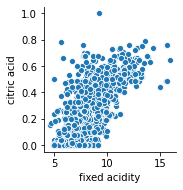

In [61]:
sns.pairplot(data=data, x_vars=['fixed acidity'], y_vars=['citric acid'])

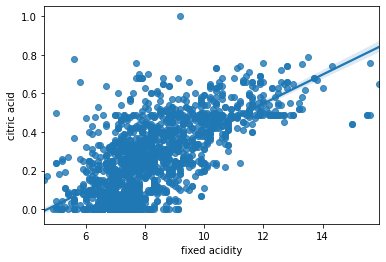

In [25]:
sns.regplot(data=data, x ="fixed acidity", y="citric acid")

The correlation is clear between fixed acidity and citric acid, because fixed acidity includes different acids and citric acid is also acid. The higher the fixed acidity, the higher the citric acid.

Text(0, 0.5, 'Fixed acidity')

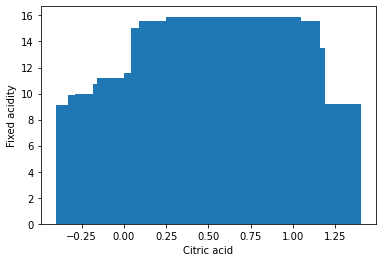

In [62]:
plt.bar(data["citric acid"], data["fixed acidity"])
plt.xlabel("Citric acid")
plt.ylabel("Fixed acidity")

### Relation between fixed acidity and pH

In [64]:
correlation = data['fixed acidity'].corr(data['pH'])
correlation

-0.6829781945685316

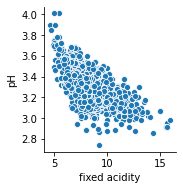

In [65]:
sns.pairplot(data=data, x_vars=['fixed acidity'], y_vars=['pH'])

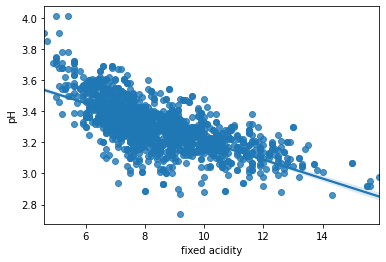

In [27]:
sns.regplot(data=data, x ="fixed acidity", y="pH")

The correlation is even stronger than the previous one. The higher the fixed acidity, the lower the pH. pH stands for power of hydrogen, which is a measurement of the hydrogen ion concentration in the solution. Solutions with a pH value less than 7 are considered acidic, strongest acids are close to 0. 

Text(0, 0.5, 'fixed acidity')

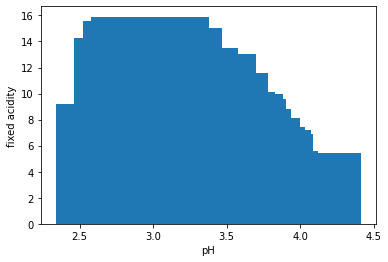

In [66]:
plt.bar(data['pH'], data["fixed acidity"])
plt.xlabel("pH")
plt.ylabel("fixed acidity")

### Relation between volatile acidity and pH

In [68]:
correlation = data['volatile acidity'].corr(data['pH'])
correlation

0.23493729440739336

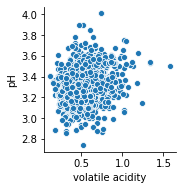

In [69]:
sns.pairplot(data=data, x_vars=['volatile acidity'], y_vars=['pH'])

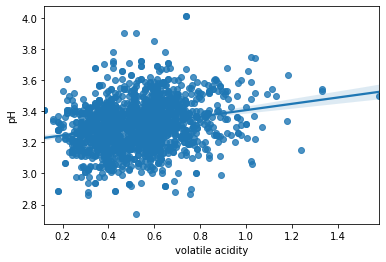

In [29]:
sns.regplot(data=data, x ="volatile acidity", y="pH")

The correlation isn't clear.

Text(0, 0.5, 'Volatile acidity')

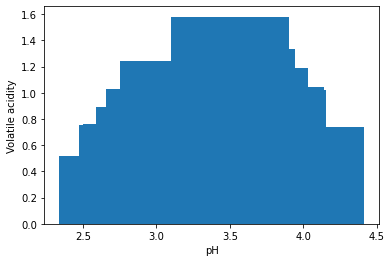

In [70]:
plt.bar(data['pH'], data["volatile acidity"])
plt.xlabel("pH")
plt.ylabel("Volatile acidity")

### Relation between citric acid and pH

In [72]:
correlation = data['citric acid'].corr(data['pH'])
correlation

-0.5419041447395097

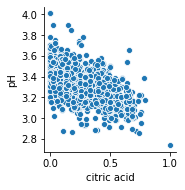

In [73]:
sns.pairplot(data=data, x_vars=['citric acid'], y_vars=['pH'])

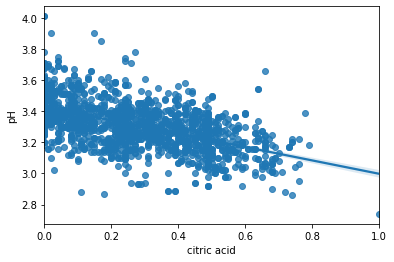

In [31]:
sns.regplot(data=data, x ="citric acid", y="pH")

The correlation is quite strong, the higher citric acid, the lower the pH. Same reason as relation fixed acidity and pH.

Text(0, 0.5, 'pH')

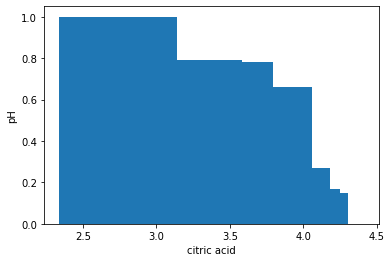

In [74]:
plt.bar(data['pH'], data["citric acid"])
plt.xlabel("citric acid")
plt.ylabel("pH")

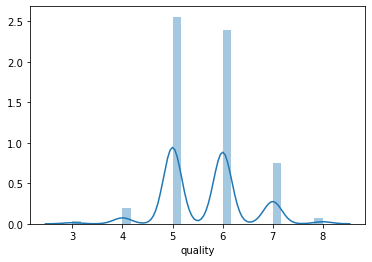

In [78]:
sns.distplot(data['quality'])

## Prediction - good and bad (Complete prediction is in project file)

In [80]:
from sklearn.model_selection import train_test_split
datapred = data.copy()
good_bad = [(datapred['quality'] < 6), (datapred['quality'] >= 6)]

In [81]:
datapred['quality_good'] = np.select(good_bad,['0','1'])

In [82]:
datapred.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_good
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [83]:
X = datapred.drop(['quality','quality_good'], axis = 1)
y = datapred.quality_good

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [85]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_features = 'sqrt')
rf.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt')

In [97]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, rf.predict(X_test))
acc

0.8041666666666667

## Comparing wine feature values

**Making datasets with only 3 or 6 or 8 quality wines. After finding mean and comparing the features in order to see why is wine the superb.**

In [99]:
data["quality"].sort_values()

1478    3
832     3
899     3
1374    3
459     3
       ..
495     8
1403    8
1090    8
1449    8
1549    8
Name: quality, Length: 1599, dtype: int64

In [114]:
databest = data.copy()
databest = databest.drop(databest[databest.quality != 8].index)
databest.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
267,7.9,0.35,0.46,3.6,0.078,15.0,37.0,0.9973,3.35,0.86,12.8,8
278,10.3,0.32,0.45,6.4,0.073,5.0,13.0,0.9976,3.23,0.82,12.6,8
390,5.6,0.85,0.05,1.4,0.045,12.0,88.0,0.9924,3.56,0.82,12.9,8
440,12.6,0.31,0.72,2.2,0.072,6.0,29.0,0.9987,2.88,0.82,9.8,8
455,11.3,0.62,0.67,5.2,0.086,6.0,19.0,0.9988,3.22,0.69,13.4,8


In [113]:
databest.quality.value_counts()

8    18
Name: quality, dtype: int64

In [123]:
databest.mean()

fixed acidity            8.566667
volatile acidity         0.423333
citric acid              0.391111
residual sugar           2.577778
chlorides                0.068444
free sulfur dioxide     13.277778
total sulfur dioxide    33.444444
density                  0.995212
pH                       3.267222
sulphates                0.767778
alcohol                 12.094444
quality                  8.000000
dtype: float64

In [115]:
#---------------------------------worst wine----------------------------

In [117]:
dataworst = data.copy()
dataworst = dataworst.drop(dataworst[dataworst.quality != 3].index)
dataworst.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
459,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3
517,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,3
690,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3
832,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3
899,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3


In [119]:
dataworst.quality.value_counts()

3    10
Name: quality, dtype: int64

In [125]:
dataworst.mean()

fixed acidity            8.360000
volatile acidity         0.884500
citric acid              0.171000
residual sugar           2.635000
chlorides                0.122500
free sulfur dioxide     11.000000
total sulfur dioxide    24.900000
density                  0.997464
pH                       3.398000
sulphates                0.570000
alcohol                  9.955000
quality                  3.000000
dtype: float64

In [126]:
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [127]:
data.mean()

fixed acidity            8.319637
volatile acidity         0.527821
citric acid              0.270976
residual sugar           2.538806
chlorides                0.087467
free sulfur dioxide     15.874922
total sulfur dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
quality                  5.636023
dtype: float64

In [129]:
dataaverage = data.copy()
dataaverage = dataaverage.drop(dataaverage[dataaverage.quality != 6].index)

In [132]:
dataaverage.mean()

fixed acidity            8.347179
volatile acidity         0.497484
citric acid              0.273824
residual sugar           2.477194
chlorides                0.084956
free sulfur dioxide     15.711599
total sulfur dioxide    40.869906
density                  0.996615
pH                       3.318072
sulphates                0.675329
alcohol                 10.629519
quality                  6.000000
dtype: float64

#### BEST WINE:
**Comparing the average wines with best quality wines we found that for the best red wine the attributes should be:**

* fixed acidity higer (avg 8.57)
* volatile acidity lower (avg 0.43)
* citric acid higher (avg 0.39)
* residual sugar lower (avg 2.58)     
* chlorides lower (avg 0.06)           
* free sulfur dioxide lower (avg 13.28)   
* total sulfur dioxide higher (avg 33.44)
* density lower (0.995)           
* pH lower (3.27)                   
* sulphates higher (0.768)            
* alcohol higher (12.09)      

But it is hard to give the values for the wine which would be rated with 9 or 10, because we can't increase only one value very much. Too much or too low can be also bad. We don't want too sour the wine or too sweet.
There needs to be some kind of balance between the features.